# Лабораторная работа 1 "Градиентный спуск и его модификации"
Выполнил студент группы М8О-114СВ-24, Терентьев И.В.

<ul>
    <li><big>В ходе лабораторной работы разработан класс, реализующий алгоритм градиентного спуска</big></li>
    <li><big>Градиент функции в точке находится численным методом</big></li>
<li><big>Реализована визуализация графика функции, точки начального приближения и найденной точки оптимума</big></li>
<li><big>Реализовано нахождение погрешности найденного решения в сравнении с аналитическим, протестировано для нескольких запусков с разными начальными приближениями</big></li>
<li><big>Запрограммирована модификация Adam, также протестировано применение для разных функций и начальных приближений</big></li>
</ul>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.typing as npt
from math import *
from matplotlib import animation

In [2]:
class GradientDescent():
    def __init__(self, func, analytical_sol, alpha, x_0, tolerance, optimizer: [None, 'Adam'] = None):
        self._func = func # Функция ошибки
        self._solution = analytical_sol
        
        self._alpha = alpha # Темп обучения
        self._X_0 = self._X = x_0 # Начальная точка
        self._tolerance = tolerance # Погрешность
        
        self._error = 0 # Ошибка
        
        self._optimizer = optimizer # Тип оптимизатора 'Adam'|None
        
        self._global_epsilon = 0.000000001 # Приращение аргумента
    
# Инструменты 
    def _count_derivative_x(self, epsilon, arg):
        return (self._func([self._global_epsilon + epsilon, arg]) - self._func([epsilon, arg]))/self._global_epsilon
    
    def _count_derivative_y(self, epsilon, arg):
        return (self._func([arg, epsilon + self._global_epsilon]) - self._func([arg, epsilon]))/self._global_epsilon

    def _count_gradient(self, X):
        return np.array([self._count_derivative_x(X[0], X[1]), self._count_derivative_y(X[1], X[0])])

    def _count_err(self, X):
        err = np.abs(self._func(self._solution) - self._func(X))
        return err

# Обучение модели 
    def _step(self):
        h = self._count_gradient(self._X) 
        step = self._X - self._alpha*h   
        return step
        
    def _step_adam(self, U, G, b1, b2, epsilon):
        U = b1*U + (1 - b1)*self._count_gradient(self._X)
        G = b2*G + (1 - b2)*np.square(self._count_gradient(self._X))
        step = self._X - self._alpha/(np.sqrt(G + epsilon))*U
        return step, U, G
        
    def train(self):
        match self._optimizer:
            case 'Adam':
                U = 0
                G = 0                
                b1 = 0.9
                b2 = 0.99
                epsilon = 1e-8
                err = self._count_err(self._X)
                while err > self._tolerance:
                    step = self._step_adam(U, G, b1, b2, epsilon)
                    self._X, U, G = step
                    err = self._count_err(self._X)
            case None:
                err = self._count_err(self._X)
                while err > self._tolerance:
                    step = self._step()
                    self._X = step
                    err = self._count_err(self._X)
                    
        self._error = err
            
# Визуализация  
    def visualize(self):
        # Визуализация решения
        X, Y = np.meshgrid([i for i in np.arange(-15, 15, 0.1)], [i for i in np.arange(-15, 15, 0.1)])
        Z = self._func([X, Y])
    
        plt.rcParams.update({
        'figure.figsize': (4, 4),
        'figure.dpi': 200,
        'xtick.labelsize': 4,
        'ytick.labelsize': 4
        })
        ax = plt.figure().add_subplot(111, projection='3d')
        ax.scatter([self._X[0]], [self._X[1]], [self._func(self._X)], color='red')
        
        ax.plot_surface(X, Y, Z, rstride=5, cstride=5, alpha=0.5)
        
        # Визуализация начальной точки
        ax.scatter([self._X_0[0]], [self._X_0[1]], [self._func(self._X_0)], color='blue')
        
        ax.view_init(30, -130)
        
        plt.show()
        
      
        
# Геттеры 
    @property
    def x(self):
        return self._X
    @property
    def err(self):
        return self._error

# Применение алгоритма градиентного спуска для функции сферы

In [143]:
def sphere_func(X):
    return np.square(X[0]) + np.square(X[1])

solution = np.array([0, 0])

<p><big>Классический метод</big></p>

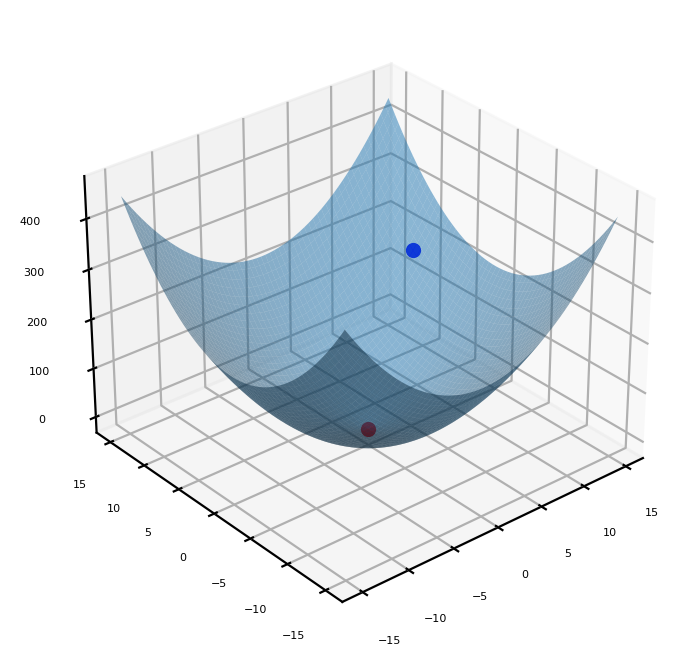

In [144]:
x_0 = np.array([12, 8]) 
tolerance = 0.001           

model = GradientDescent(sphere_func, solution, 0.95, x_0, tolerance)
res = model.train()
model.visualize()

In [145]:
x_0 = [np.array([12, 8]), np.array([2, 4]), np.array([5, 11])]
for x in x_0:
    model = GradientDescent(sphere_func, solution, 0.95, x, tolerance)
    res = model.train()
    print(f'Погрешность найденного решения класс. методом для начальной точки {x} составила {model.err}')

Погрешность найденного решения класс. методом для начальной точки [12  8] составила 0.0008292399083398398
Погрешность найденного решения класс. методом для начальной точки [2 4] составила 0.0009996045487161832
Погрешность найденного решения класс. методом для начальной точки [ 5 11] составила 0.0008871557047426873


<p><big>С использованием оптимизатора Adam</big></p>

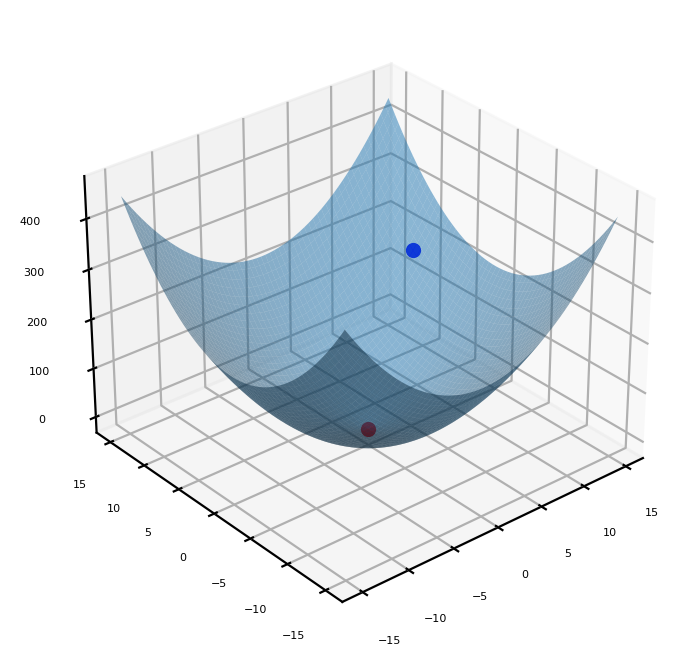

In [146]:
x_0 = np.array([12, 8]) # Инициализация
tolerance = 0.001           # Погрешность   

model = GradientDescent(sphere_func, solution, 0.95, x_0, tolerance, 'Adam')
model.train()
model.visualize()

In [147]:
x_0 = [np.array([12, 8]), np.array([2, 4]), np.array([5, 11])]
for x in x_0:
    model = GradientDescent(sphere_func, solution, 0.95, x, tolerance, 'Adam')
    res = model.train()
    print(f'Погрешность найденного решения с оптимизатором Adam для начальной точки {x} составила {model.err}')

Погрешность найденного решения с оптимизатором Adam для начальной точки [12  8] составила 0.0004749579352511078
Погрешность найденного решения с оптимизатором Adam для начальной точки [2 4] составила 0.0006763782024542598
Погрешность найденного решения с оптимизатором Adam для начальной точки [ 5 11] составила 0.0008781433466224907


# Применение алгоритма градиентного спуска для функции Матьяса

In [148]:
def matyas_func(X):
    return 0.26*(np.square(X[0]) + np.square(X[1])) - 0.48*X[0]*X[1]

solution = np.array([0, 0])

<p><big>Классический метод</big></p>

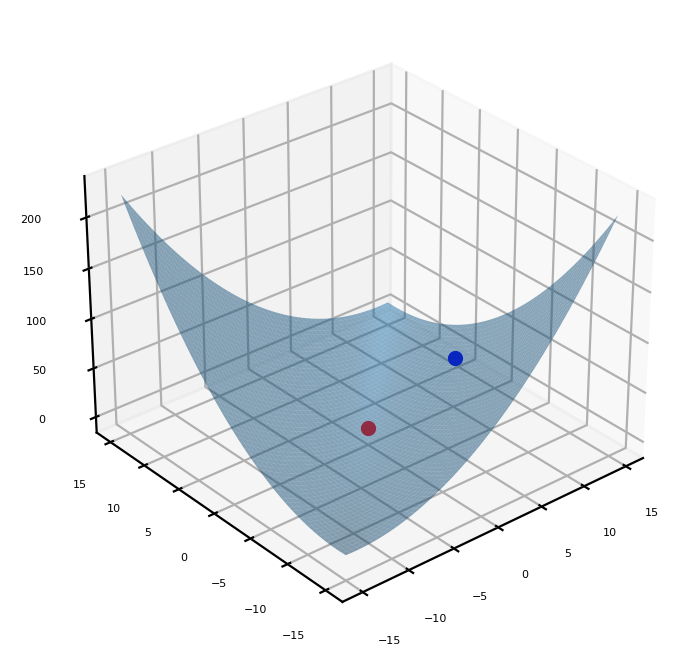

In [149]:
x_0 = np.array([11, 1]) # Инициализация
tolerance = 0.001       # Погрешность   

model = GradientDescent(matyas_func, solution, 0.01, x_0, tolerance)
res = model.train()
model.visualize()

In [150]:
x_0 = [np.array([10, 7]), np.array([3, 2]), np.array([6, 8])]
for x in x_0:
    model = GradientDescent(matyas_func, solution, 0.95, x, tolerance)
    res = model.train()
    print(f'Погрешность найденного решения класс. методом для начальной точки {x} составила {model.err}')

Погрешность найденного решения класс. методом для начальной точки [10  7] составила 0.0009884697793227856
Погрешность найденного решения класс. методом для начальной точки [3 2] составила 0.0009443859959319574
Погрешность найденного решения класс. методом для начальной точки [6 8] составила 0.0009875723740556033


<p><big>С использованием оптимизатора Adam</big></p>

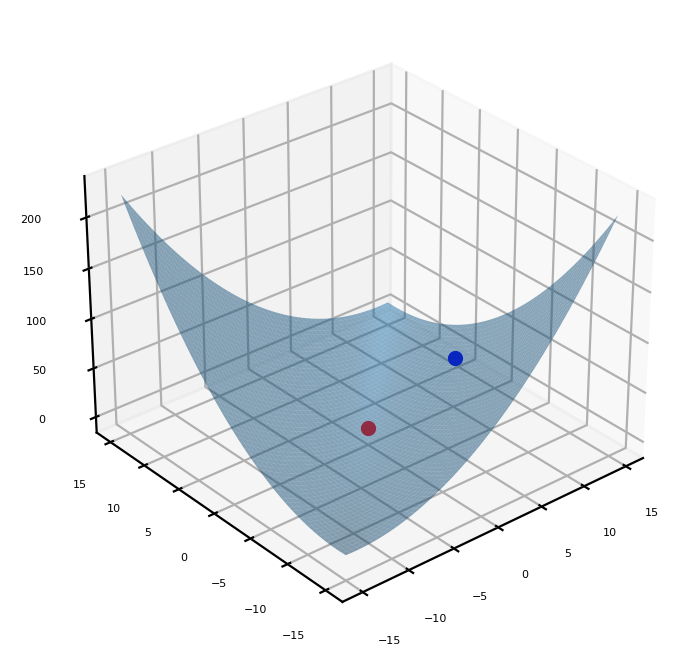

0.000980481267806423


In [151]:
x_0 = np.array([11, 1]) # Инициализация
tolerance = 0.001       # Погрешность   

model = GradientDescent(matyas_func, solution, 0.01, x_0, tolerance, 'Adam')
res = model.train()
model.visualize()
print(model.err)

In [152]:
x_0 = [np.array([10, 7]), np.array([3, 2]), np.array([6, 8])]
for x in x_0:
    model = GradientDescent(matyas_func, solution, 0.95, x, tolerance, 'Adam')
    res = model.train()
    print(f'Погрешность найденного решения с оптимизатором Adam для начальной точки {x} составила {model.err}')

Погрешность найденного решения класс. методом для начальной точки [10  7] составила 0.00015561950301272182
Погрешность найденного решения класс. методом для начальной точки [3 2] составила 0.0006683071731917306
Погрешность найденного решения класс. методом для начальной точки [6 8] составила 4.6342523828912936e-05
